## Темы, которые разбираем в данном ноутбуке:

* ### Биофизика ЭЭГ
* ### Ритмы головного мозга

-------------------------------------------------------------------------------------------------------------------------------------------
### Запись ЭЭГ = определение электрической активности пирамидных нейронов коры (3 и 5 слои). 

##### Обратимся к ***Рис. 1 Возникновение диполя*** и ***Рис. 2 Пирамидные нейроны*** (sources: https://golnk.ru/wB7Jz)

* На вертикальный дендрит пирамидного нейрона приходит возбуждающий постсинаптический потенциал (ВПСП);
* Ионы $Na^+$ заходят внутрь через глутаматные (AMPA и NMDA) каналы;
* Ионы движутся по дендриту "сверху вниз" - от места прихода ВПСП к телу пирамидного нейрона;
* На теле нейрона "цепь замыкается" - ионы натрия выходят через каналы утечки в межклеточное пространство
(*формально, они частично учтекали в течение всего движения по дендриту*).

##### Что мы получили? 
* на месте, где пришёл ВПСП (на поверхности денрита) возник (-);
* на месте, где ионы $Na^+$ вышли наружу (тело нейрона), возник (+);
* Резултат - диполь.


 

<div style="display: flex; justify-content: center; gap: 20px;">
    <div style="text-align: center;">
        <a href="../assets/neuron's dipole (Gemini_Generated).png">
            <img src="../assets/neuron's dipole (Gemini_Generated).png" width="500" style="max-width: none;">
            <br>
            <b>Рис. 1.</b> Возникновение диполя
            <a href="../assets/proof.png">
        </a>
    </div>
    <div style="text-align: center;">
        <a href="../assets/pyramidal_neurons.webp">
            <img src="../assets/pyramidal_neurons.webp" width="400" style="max-width: none;">
            <br>
            <b>Рис. 2.</b> Пирамидные нейроны
    </div>
</div>

$$
\begin{array}{c} 
    \text{\textbf{Точка измерения (Скальп)}} \\
    % \rlap прячет ширину текста в скобках, чтобы он не сбивал центр
    \bullet \quad E = E(+) - E(-) \rlap{\text{ (в проекции на вертикальную ось)}} \\
    \Big\uparrow \boldsymbol{r} \text{ (Расстояние)} \\
    \hline \text{Череп / Мозговые оболочки} \\
    \Big\uparrow \\
    \ominus \quad Q_2 \text{ (Sink / Сток)} \\
    \big\downarrow \boldsymbol{\vec{P}} \text{ (Дипольный момент)} \\
    \oplus \quad Q_1 \text{ (Source / Источник)} \\
    \text{\textit{Пирамидный нейрон}}
\end{array}
$$

##### Чтобы мы уловили поле диполя через толщину черепа, должно выполняться дополнительно два условия
* 1) **Поля разных нейронов должны складываться, а не гасить друг друга**

*Это достигается за счёт того, что вертикальные дендриты огромного количества пирамидных нейронов расположены параллельно в коре.*
* 2) **Генерация диполя должна быть синхронной**

*Это достигается за счёт синхронной подачи сигналов от таламуса (генерируется этот ритм пейсмейкерными клетками).*

In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [35]:
# Создаём массивы значений, имитирующие синхронное и ассинхронное возбуждение нейронов
timeline = np.linspace(0, 1, 1000) 

signal_sync = np.random.uniform(0, 0.1, (1000, 1))
signal_non_sync = np.random.uniform(0, 2*np.pi, (1000, 1))

neurons_group_sync = np.sin (10 * np.pi * timeline + signal_sync) # 10 - частота; будем считать, что это альфа-ритм
neurons_group_non_sync = np.sin (10 * np.pi * timeline + signal_non_sync)


In [36]:
eeg_sync = np.mean(neurons_group_sync, axis=0)
print (eeg_sync[:5])
eeg_non_sync = np.mean(neurons_group_non_sync, axis=0)
print (eeg_non_sync[:5])

[0.05140261 0.08276557 0.11404669 0.14521503 0.17623977]
[-0.01252087 -0.01293976 -0.01334586 -0.01373876 -0.01411807]


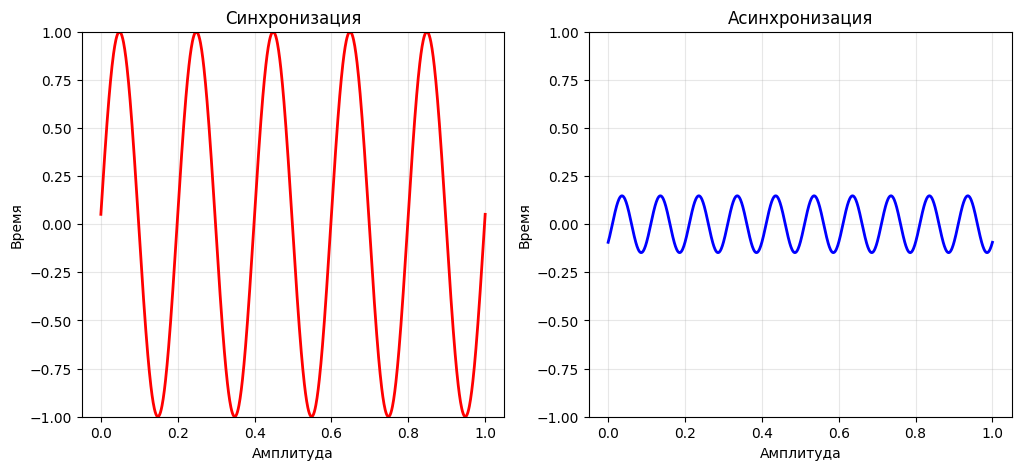

In [37]:
ig, ax = plt.subplots(1,2, figsize = (12,5))

# график 1 - синхронизация
ax[0].plot(t, eeg_sync, color='red', linewidth=2)
ax[0].set_title('Синхронизация')
ax[0].set_ylim(-1, 1)
ax[0].set_xlabel('Амплитуда')
ax[0].set_ylabel('Время')
ax[0].grid(True, alpha=0.3)

# график 2 - асинхронизаця
ax[1].plot(t, eeg_async, color='blue', linewidth=2)
ax[1].set_title('Асинхронизация')
ax[1].set_ylim(-1, 1)
ax[1].set_xlabel('Амплитуда')
ax[1].set_ylabel('Время')
ax[1].grid(True, alpha=0.3)

plt.show()